In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../data_loaders/")
sys.path.append("../forward_model/")
import stacklineplot
from pylab import rcParams
from scipy import signal
import random

In [25]:
from forward_model_dataloader import ForwardModelDataset

In [14]:
# estimated_eegs = ForwardModelDataset(10)
# x = estimated_eegs[0][0]
# x = np.random.randn(20, 768)

In [110]:
def apply_at_random_loc(x, adding, window_len, b=1):
    start = int(random.random() * (x.shape[1] - window_len))
    end = start + window_len
    adding_coef = [0] * start + [1] * window_len + [0] * (x.shape[1] - end)
    assert(len(adding_coef) == x.shape[1])
    adding_coef = np.asarray(adding_coef).reshape(768, 1)
    adding_coef = np.tile(adding_coef, (1, x.shape[0])).T
    adding *= adding_coef
    x += adding
    return x

In [62]:
def add_random_noise(x, b=1):
    noise = np.random.randn(x.shape[0], x.shape[1]) * .2
    return x + (noise * b)
def add_signal_square(x, b=1):
    t = np.linspace(0, x.shape[0], x.shape[1], endpoint=False)
    sig = np.sin(2 * np.pi * t)
    pwm = signal.square(t * np.pi * 40 * t * (random.random() ** 2 * 400)) #, duty=(sig + 1)/2)
    return x + (pwm * b)

In [174]:
def get_signal_square(x, b=1):
    t = np.linspace(0, x.shape[0], x.shape[1], endpoint=False)
    sig = np.sin(5 * np.pi * t)
    pwm = signal.square(t * np.pi * 5 * t) #, duty=(sig + 1)/2)
    pwm = np.tile(pwm.reshape(768, 1), (1, x.shape[0])).T
    return pwm * b

In [205]:
def get_sine_wave(x, freq_coef, b=1):
    n_channels = x.shape[0]
    n_samples = x.shape[1]
    z = np.linspace(0, n_channels, n_samples, endpoint=False) * freq_coef
    noise = np.sin(z)
    noise = np.tile(noise.reshape(n_samples, 1), (1, n_channels)).T
    return noise * b

In [214]:
x = np.zeros((20, 768))
x = np.random.randn(20, 768)
noise = get_signal_square(x, b=5)
x = apply_at_random_loc(x, noise, 400)
noise = get_sine_wave(x, freq_coef=9000, b=4)
x = apply_at_random_loc(x, noise, 400)

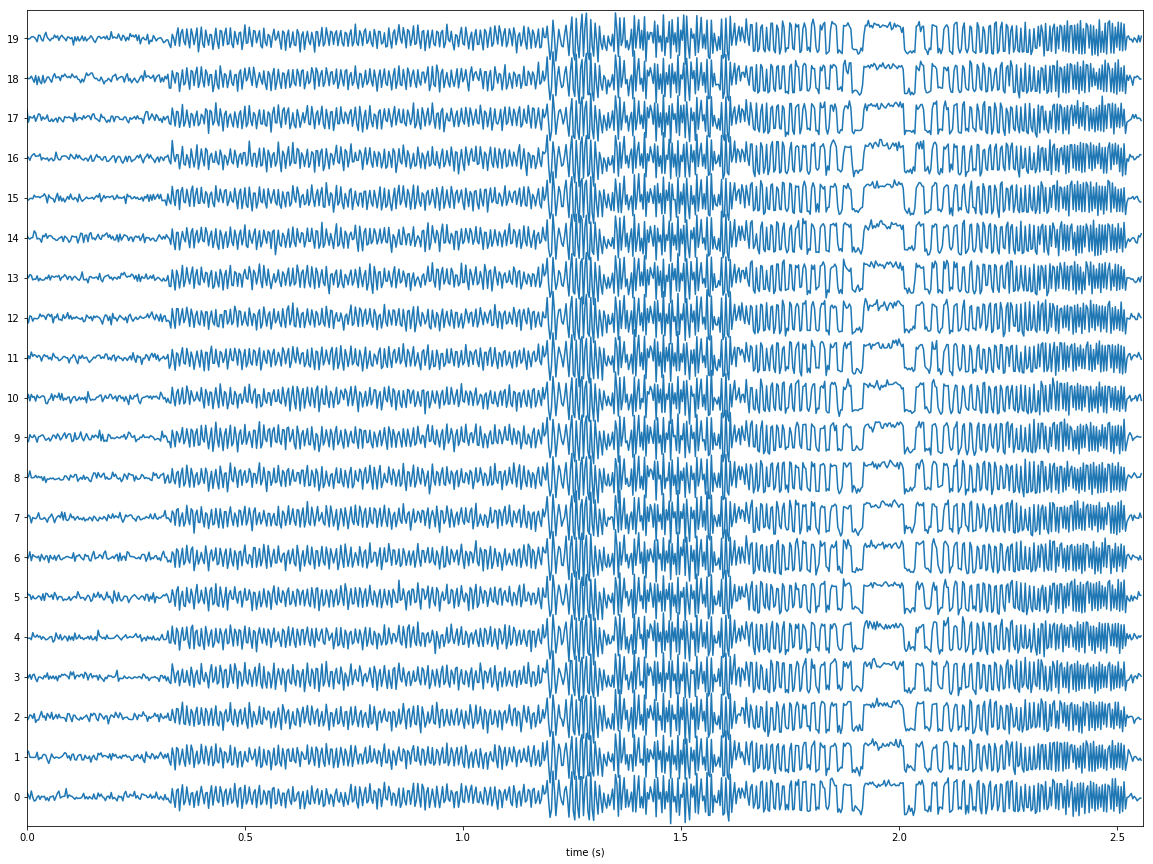

In [216]:
sample = x
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(sample ,seconds=768/300, ylabels=list(range(sample.shape[0])), yscale=1)

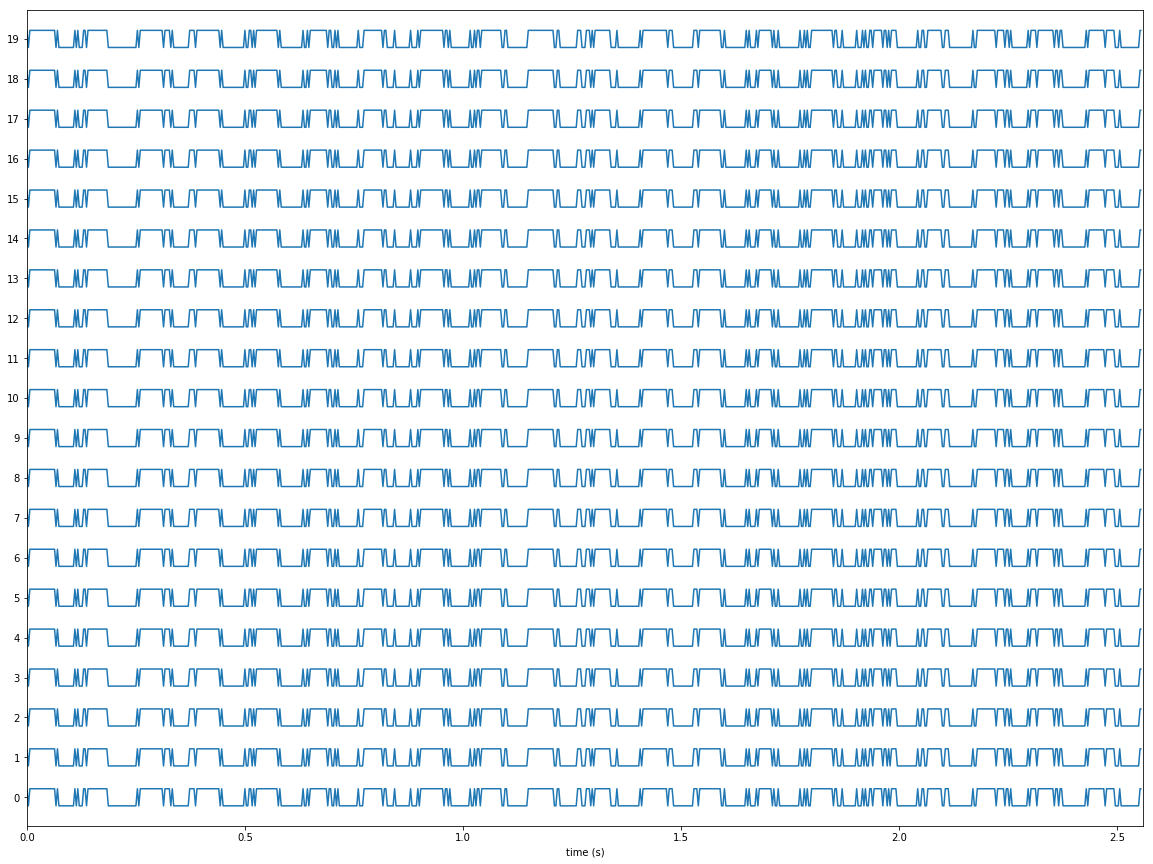

In [38]:
sample = x
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(sample ,seconds=768/300, ylabels=list(range(sample.shape[0])), yscale=.3)